# Fundamentos de clustering

## Tu primer clustering con scikit-learn

### Importar librerias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

### DataFrame

In [2]:
# Llamamos a la función make_blobs para generar datos de prueba
# x es un array de 100 filas y 2 columnas, [n_samples, n_features], contiene las muestras
# y es un array de 100 filas y 1 columna, [n_samples], contiene las etiquetas de cluster para cada muestra
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1, 1.5, 2, 2], random_state=42)

In [3]:
# DataFrame de pandas para visualizar los datos creados anteriormente
# Se crea a partir de un diccionario
df = pd.DataFrame({
    # Selecciona todos los elementos de la primera columna (índice 0) de la matriz x y los asigna a la columna 'x1'
    'x1': x[:,0],
    # Selecciona todos los elementos de la segunda columna (índice 1) de la matriz x y los asigna a la columna 'x2'
    'x2': x[:,1],
    # Asigna las etiquetas de cluster a la columna 'y'
    'y' : y
})
df.head()

,x1,x2,y
0,-10.531915,4.293828,3
1,-5.252593,-9.341838,2
2,-2.978672,9.556846,0
3,-4.074039,-9.683812,2
4,-8.122753,8.445092,3


### Representación de los datos

In [4]:
def plot_2d_clusters(x,y,ax):
    """
    Función para trazar un gráfico de dispersión de los datos en x, agrupados por los valores únicos en y. 
    Cada grupo se representa con un marcador diferente.
    """
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        x[y==_].plot(
            title=f'{len(y_uniques)} clusters',
            kind='scatter',
            x='x1',
            y='x2',
            marker=f'${_}$',
            ax=ax
        )

Representando los clusters

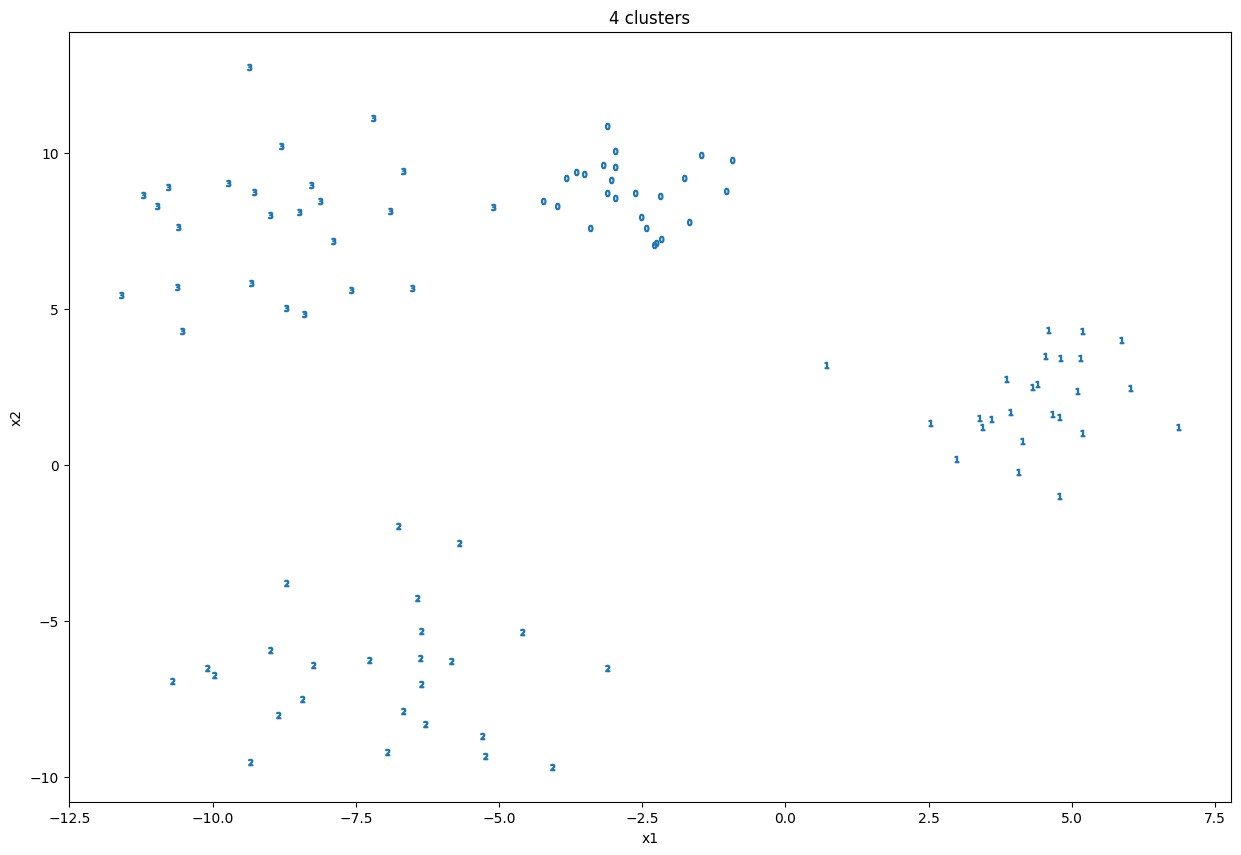

In [5]:
# Se crea un gráfico de dispersión de los datos
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Se parte el df en x y y
x, y = df[['x1', 'x2']], df['y']
# Se llama a la función plot_2d_clusters
plot_2d_clusters(x, y, ax)

### Aplicando clustering

In [6]:
# Se crea un objeto KMeans con 4 clusters
KMeans = KMeans(n_clusters=4, random_state=42)
# Se ajusta el modelo a los datos
y_pred = KMeans.fit_predict(x)

Text(0.5, 1.0, 'KMeans 4 clusters')

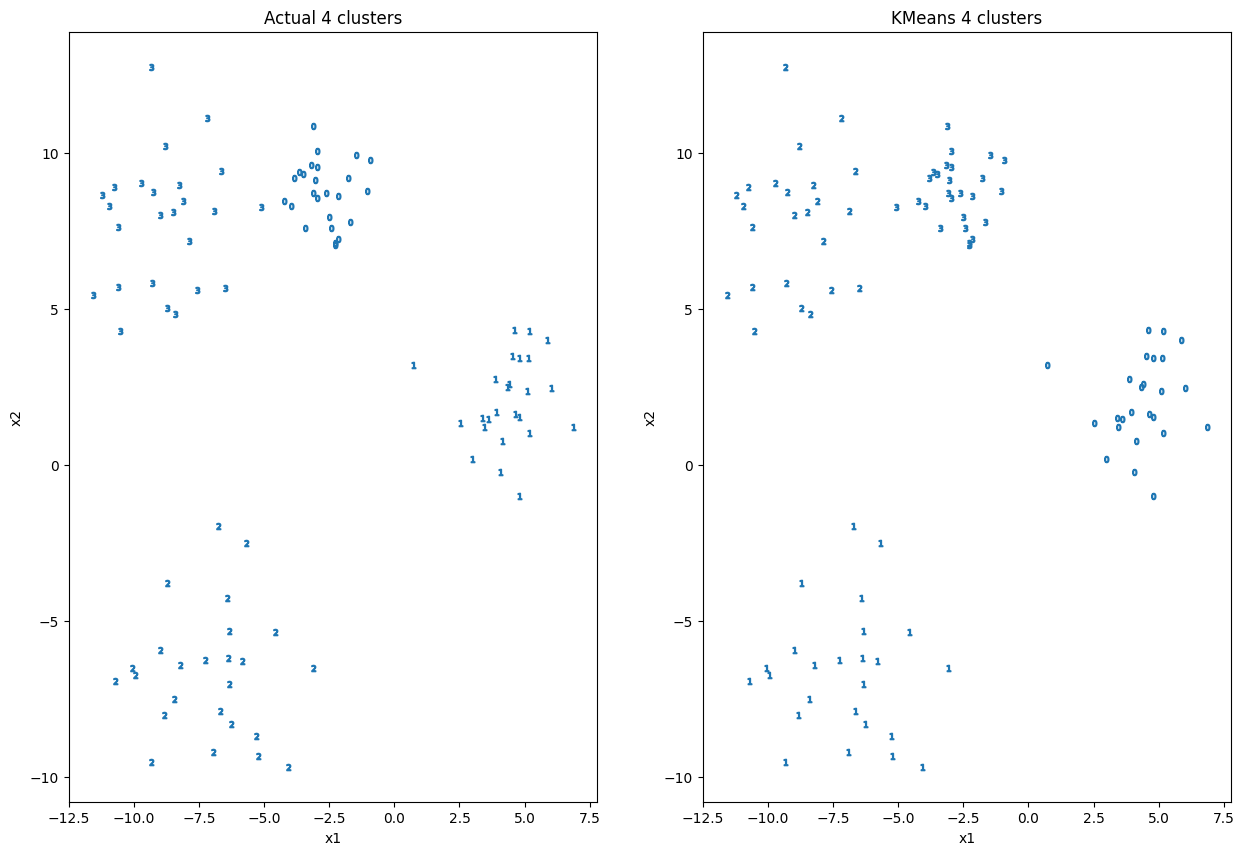

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
plot_2d_clusters(x, y, axs[0])
plot_2d_clusters(x, y_pred, axs[1])

axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[1].set_title(f'KMeans {axs[1].get_title()}')